In [22]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [23]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
len(train_labels)

60000

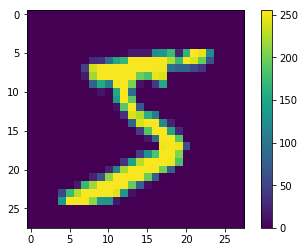

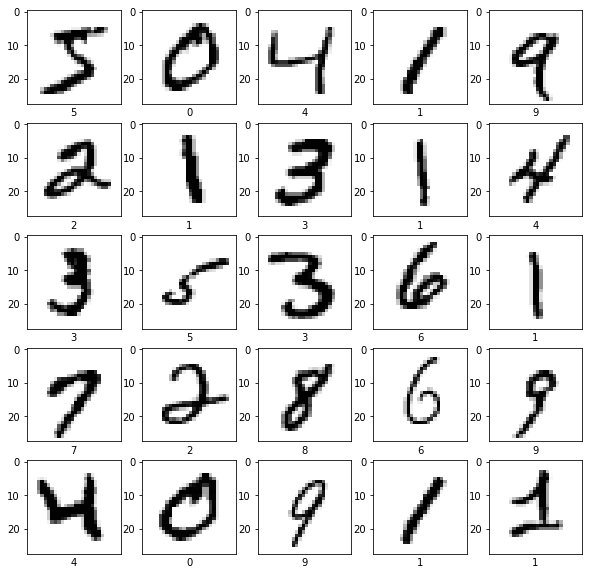

In [42]:
#预处理
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

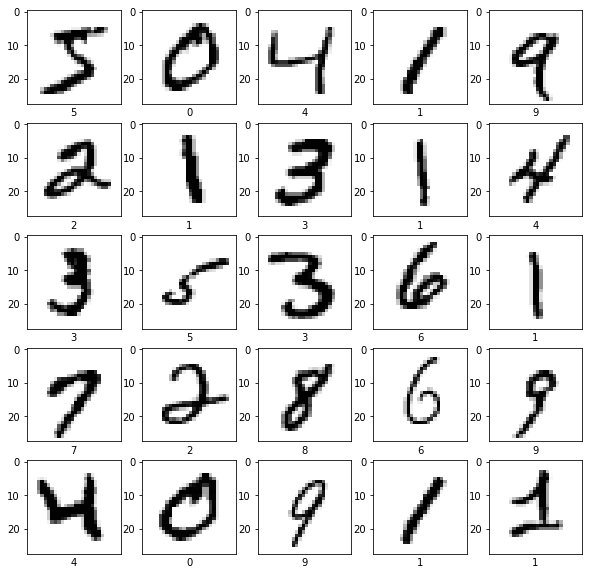

In [43]:
train_images=train_images/255.0
test_images=test_images/255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [44]:
#构建模型
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation=tf.nn.relu),keras.layers.Dense(10,activation=tf.nn.softmax)])
#编译
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2679 - acc: 0.9231
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1192 - acc: 0.9644
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0817 - acc: 0.9752
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0623 - acc: 0.9808
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
Test accuracy: 0.9756


In [45]:
predictions=model.predict(test_images)

In [46]:
predictions[0]

array([5.4993160e-07, 5.9395302e-07, 8.8507863e-05, 1.6038256e-03,
       8.0394602e-10, 6.1422543e-07, 1.6169453e-11, 9.9830317e-01,
       1.8169624e-06, 9.2786314e-07], dtype=float32)

In [47]:
np.argmax(predictions[0])

7

In [48]:
test_labels[0]

7

In [64]:
def plot_image(i,predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label],color=color))
    

In [65]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

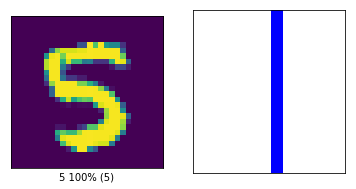

In [68]:
i=120
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

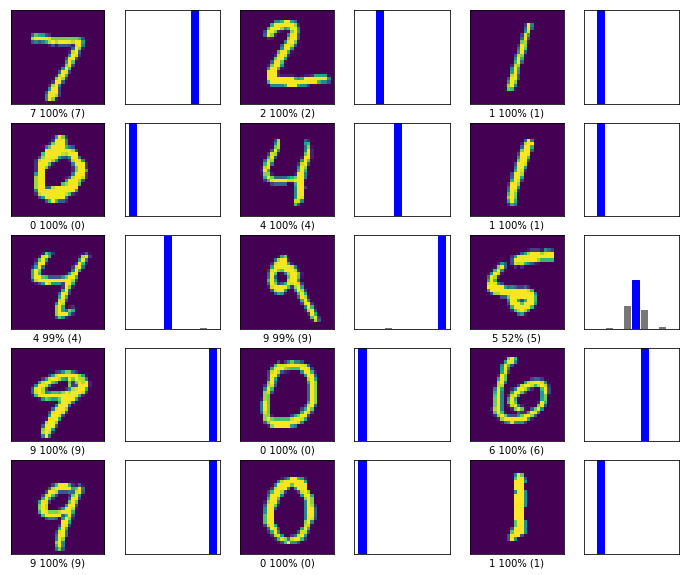

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
 